In [1]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras.layers import Flatten, add, Dense, Dropout 
from keras.callbacks import ModelCheckpoint, EarlyStopping


print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.8.2


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
##############################################################
##### Wczytanie zbioru testowego po rozszerzeniu danych  #####
##############################################################

In [8]:
#Wczytanie etykiet do testowania

with open(  '../../../Dane/Przeplatane_kolumny_probki/Test/test.csv'   ,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value_test = []
for i in new[0]:
    value_test.append(int(i))    
    
print(len(value_test))

2520


In [10]:
#Wczytanie zdjęć testowych 
images_test = []
size = len(value_test)

for i in range(size):
    im = Image.open('../../../Dane/Przeplatane_kolumny_probki/Test/'+str(i)+'.png')
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    images_test.append(arr_im) 
print(len(images_test))

2520


In [11]:
x_test = np.array(images_test)
y_test = np.array(value_test)

1


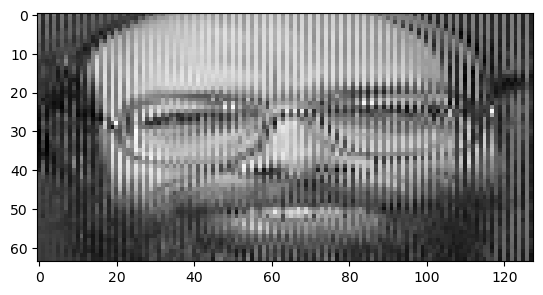

In [12]:
a = 2
plt.imshow(x_test[a],cmap = 'gray')
print(y_test[a])

In [14]:
best_model = tf.keras.models.load_model('Model_przeplatane_kolumny.h5', compile=False) 

best_model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy','mse'])

2023-10-24 22:05:04.463161: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-24 22:05:04.480427: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
best_model.evaluate(x_test,  y_test, verbose=2)

79/79 - 8s - loss: 0.0808 - accuracy: 0.8802 - mse: 0.0808 - 8s/epoch - 98ms/step


[0.08078201901581553, 0.8801587301587301, 0.08078201920385497]

In [16]:
predict_x = best_model.predict(x_test) 

predictions = (predict_x > 0.5).astype("int32")

In [17]:
names = [['Tn','Nn'],['Np', 'Tp']]
names = np.reshape(names,(2,2))
print(names)

conf = tf.math.confusion_matrix(y_test,predictions)

print(conf)

[['Tn' 'Nn']
 ['Np' 'Tp']]
tf.Tensor(
[[1026  234]
 [  68 1192]], shape=(2, 2), dtype=int32)


In [18]:
predictions.tofile('predictions.csv', sep = '\n') 
predict_x.tofile('predict_x.csv', sep = '\n') 
y_test.tofile('test_label.csv', sep = '\n') 

In [ ]:
#Wczytanie zbioru testowego BEZ rozszerzenia danych

In [19]:
#Wczytanie etykiet do testowania

with open(  './Dane_testowe/test_label_clear.csv',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value_test = []
for i in new[0]:
    value_test.append(int(i))    
    
print(len(value_test))

360


In [20]:
#Wczytanie zdjęć testowych bez rozszerzenia
images_test = []
size = len(value_test)

for i in range(size):
    im = Image.open('./Dane_testowe/'+str(i)+'.png')
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    images_test.append(arr_im) 
print(len(images_test))

360


In [21]:
x_test_clear = np.array(images_test)
y_test_clear = np.array(value_test)

0


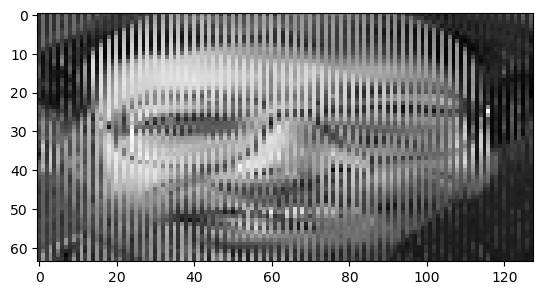

In [22]:
a = 200
plt.imshow(x_test_clear[a],cmap = 'gray')
print(y_test_clear[a])

In [23]:
best_model.evaluate(x_test_clear,  y_test_clear, verbose=2)

12/12 - 1s - loss: 0.0942 - accuracy: 0.8667 - mse: 0.0942 - 1s/epoch - 87ms/step


[0.0941837415099144, 0.8666666666666667, 0.09418374256763132]

In [24]:
predict_x_clear = best_model.predict(x_test_clear) 

predictions_clear = (predict_x_clear > 0.5).astype("int32")

In [25]:
names = [['Tn','Nn'],['Np', 'Tp']]
names = np.reshape(names,(2,2))
print(names)

conf = tf.math.confusion_matrix(y_test_clear,predictions_clear)

print(conf)

[['Tn' 'Nn']
 ['Np' 'Tp']]
tf.Tensor(
[[143  37]
 [ 11 169]], shape=(2, 2), dtype=int32)


In [26]:
predictions_clear.tofile('predictions_clear.csv', sep = '\n') 
predict_x_clear.tofile('predict_x_clear.csv', sep = '\n') 